In [1]:
from datetime import datetime
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#read in the health outcomes data
my_data = pd.read_csv('DHA78_healthoutcomes.csv')
#look at a few lines
my_data.head()

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
0,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Clare,Number,2190.0
1,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cork,Number,7835.0
2,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cavan,Number,1750.0
3,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Carlow,Number,1382.0
4,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Donegal,Number,4273.0


In [3]:
#see what values are numerical and what they look like
my_data.describe()

,Year,VALUE
count,9744.000000,9398.000000
mean,2020.000000,731.752834
std,2.000103,4282.744205
min,2017.000000,0.280000
25%,2018.000000,2.570000
50%,2020.000000,28.935000
75%,2022.000000,229.000000
max,2023.000000,94504.000000


In [4]:
#look at datatypes
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  9744 non-null   object 
 1   Year             9744 non-null   int64  
 2   Sex              9744 non-null   object 
 3   ISHMT            9744 non-null   object 
 4   Area             9744 non-null   object 
 5   UNIT             9744 non-null   object 
 6   VALUE            9398 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 533.0+ KB


In [5]:
#look at all data
my_data

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
0,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Clare,Number,2190.00
1,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cork,Number,7835.00
2,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cavan,Number,1750.00
3,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Carlow,Number,1382.00
4,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Donegal,Number,4273.00
...,...,...,...,...,...,...,...
9739,"Hospital Discharges Per 1,000 Population",2023,Female,Other diseases of the respiratory system (J60-...,Co. Westmeath,Rate,1.73
9740,"Hospital Discharges Per 1,000 Population",2023,Female,Other diseases of the respiratory system (J60-...,Co. Wexford,Rate,1.35
9741,"Hospital Discharges Per 1,000 Population",2023,Female,Other diseases of the respiratory system (J60-...,Non-residents,Rate,NaN
9742,"Hospital Discharges Per 1,000 Population",2023,Female,Other diseases of the respiratory system (J60-...,Ireland plus non-residents,Rate,NaN


In [6]:
#Start cleaning the data
#Look at all hospital discharges as it works better when they data needs to be aggregated later in the script
#hosp_discharges = my_data[my_data['Statistic Label']== 'Hospital Discharges Per 1,000 Population']
hosp_discharges = my_data[my_data['Statistic Label']== 'All Hospital Discharges']

In [7]:
hosp_discharges

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
0,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Clare,Number,2190.0
1,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cork,Number,7835.0
2,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cavan,Number,1750.0
3,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Carlow,Number,1382.0
4,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Donegal,Number,4273.0
...,...,...,...,...,...,...,...
4867,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Westmeath,Number,86.0
4868,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Wexford,Number,115.0
4869,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Non-residents,Number,14.0
4870,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Ireland plus non-residents,Number,4587.0


In [8]:
#don't include the totals like Ireland, or Non-residents as they can't be matched back to the air quality data based on county
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Ireland plus non-residents']
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Ireland']
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Non-residents']

In [9]:
#look at data
hosp_discharges

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
0,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Clare,Number,2190.0
1,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cork,Number,7835.0
2,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Cavan,Number,1750.0
3,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Carlow,Number,1382.0
4,All Hospital Discharges,2017,Both sexes,Diseases of the respiratory system (J00-J99),Co. Donegal,Number,4273.0
...,...,...,...,...,...,...,...
4864,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Tipperary,Number,159.0
4865,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Waterford,Number,86.0
4866,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Wicklow,Number,106.0
4867,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Westmeath,Number,86.0


In [10]:
#data is doubled for both sexes.. either get rid of it or the individual sexes.. chose to keep the granularity
hosp_discharges = hosp_discharges[hosp_discharges['Sex']!= 'Both sexes']
hosp_discharges

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
232,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Clare,Number,1095.0
233,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Cork,Number,3957.0
234,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Cavan,Number,914.0
235,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Carlow,Number,623.0
236,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Donegal,Number,2251.0
...,...,...,...,...,...,...,...
4864,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Tipperary,Number,159.0
4865,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Waterford,Number,86.0
4866,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Wicklow,Number,106.0
4867,All Hospital Discharges,2023,Female,Other diseases of the respiratory system (J60-...,Co. Westmeath,Number,86.0


In [11]:
#get uniques values of Year
hosp_discharges['Year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [12]:
#get uniques values of Sex
hosp_discharges['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
#get uniques values of Diagnosis
hosp_discharges['ISHMT'].unique()

array(['Diseases of the respiratory system (J00-J99)',
       'Acute upper respiratory infections & influenza (J00-J11)',
       'Pneumonia (J12-J18)',
       'Other acute lower respiratory infections (J20-J22)',
       'Other diseases of upper respiratory tract (J30-J34, J36-J39)',
       'Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)',
       'Asthma (J45-J46)',
       'Other diseases of the respiratory system (J60-J99)'], dtype=object)

In [14]:
#get uniques values of Area
hosp_discharges['Area'].unique()

array(['Co. Clare', 'Co. Cork', 'Co. Cavan', 'Co. Carlow', 'Co. Donegal',
       'Co. Dublin', 'Co. Galway', 'Co. Kildare', 'Co. Kilkenny',
       'Co. Kerry', 'Co. Longford', 'Co. Louth', 'Co. Limerick',
       'Co. Leitrim', 'Co. Laois', 'Co. Meath', 'Co. Monaghan',
       'Co. Mayo', 'Co. Offaly', 'Co. Roscommon', 'Co. Sligo',
       'Co. Tipperary', 'Co. Waterford', 'Co. Wicklow', 'Co. Westmeath',
       'Co. Wexford'], dtype=object)

In [15]:
#get uniques values of unit
hosp_discharges['UNIT'].unique()

array(['Number'], dtype=object)

In [16]:
#count if any values are missing
hosp_discharges.isnull().sum()

Statistic Label    0
Year               0
Sex                0
ISHMT              0
Area               0
UNIT               0
VALUE              0
dtype: int64

In [17]:
#start looking at some initial visualisations for EDA
hosp_discharges_dub = hosp_discharges[hosp_discharges['Area']=='Co. Dublin']
hosp_discharges_dub


,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
237,All Hospital Discharges,2017,Male,Diseases of the respiratory system (J00-J99),Co. Dublin,Number,10036.0
266,All Hospital Discharges,2017,Male,Acute upper respiratory infections & influenza...,Co. Dublin,Number,808.0
295,All Hospital Discharges,2017,Male,Pneumonia (J12-J18),Co. Dublin,Number,1777.0
324,All Hospital Discharges,2017,Male,Other acute lower respiratory infections (J20-...,Co. Dublin,Number,1717.0
353,All Hospital Discharges,2017,Male,Other diseases of upper respiratory tract (J30...,Co. Dublin,Number,1188.0
...,...,...,...,...,...,...,...
4732,All Hospital Discharges,2023,Female,Other acute lower respiratory infections (J20-...,Co. Dublin,Number,1783.0
4761,All Hospital Discharges,2023,Female,Other diseases of upper respiratory tract (J30...,Co. Dublin,Number,1470.0
4790,All Hospital Discharges,2023,Female,Chronic obstructive pulmonary disease & bronch...,Co. Dublin,Number,2512.0
4819,All Hospital Discharges,2023,Female,Asthma (J45-J46),Co. Dublin,Number,1074.0


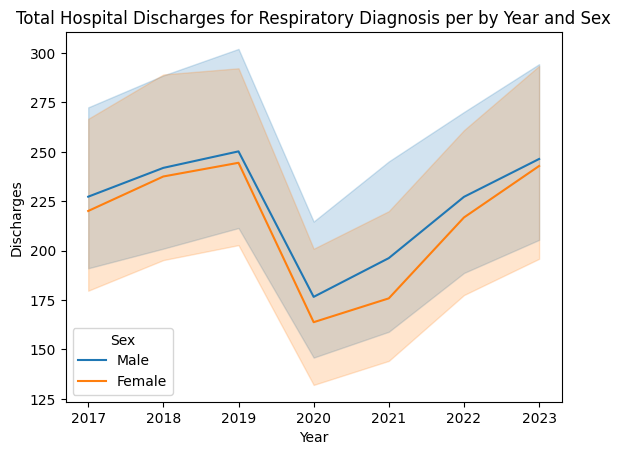

In [150]:
sns.lineplot(data=hosp_discharges, x='Year', y='VALUE', hue='Sex')
plt.title('Total Hospital Discharges for Respiratory Diagnosis per by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')
plt.savefig('total_hospital_discharges_sex_year.png', format='png', bbox_inches='tight')
plt.show()

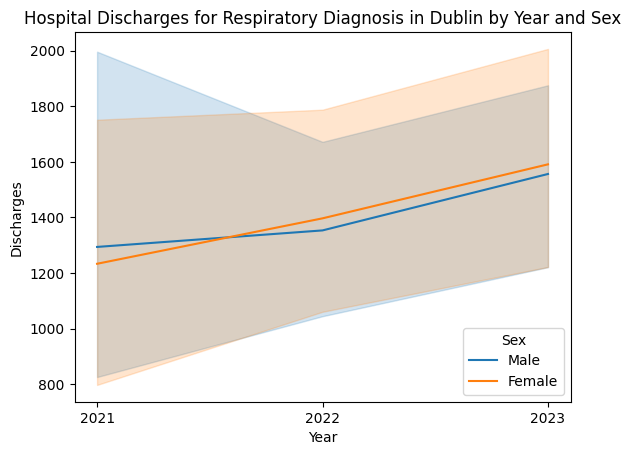

In [153]:
sns.lineplot(data=hosp_discharges_dub, x='Year', y='VALUE', hue='Sex')
plt.title('Hospital Discharges for Respiratory Diagnosis in Dublin by Year and Sex')
plt.xlabel('Year')
plt.xticks([2021,2022,2023])
plt.ylabel('Discharges')
plt.savefig('dublin_hospital_discharges_sex_year.png', format='png', bbox_inches='tight')
plt.show()

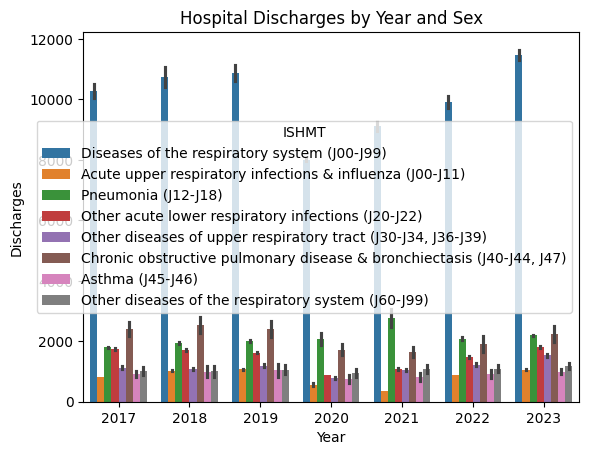

In [20]:
sns.barplot(data=hosp_discharges_dub, x='Year', y='VALUE', hue='ISHMT')
plt.title('Hospital Discharges by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')
plt.show()

In [21]:
#remove the diagnosis 'Diseases of the respiratory system' as it is a total of all diagnosis.
hosp_discharges = hosp_discharges[hosp_discharges['ISHMT']!= 'Diseases of the respiratory system (J00-J99)']

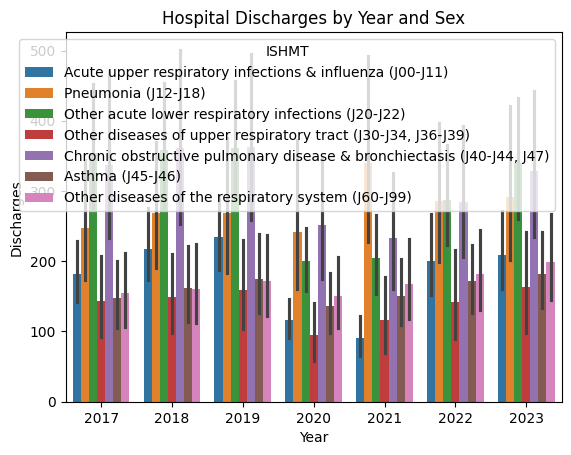

In [22]:
sns.barplot(data=hosp_discharges, x='Year', y='VALUE', hue='ISHMT')
plt.title('Hospital Discharges by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')
plt.show()

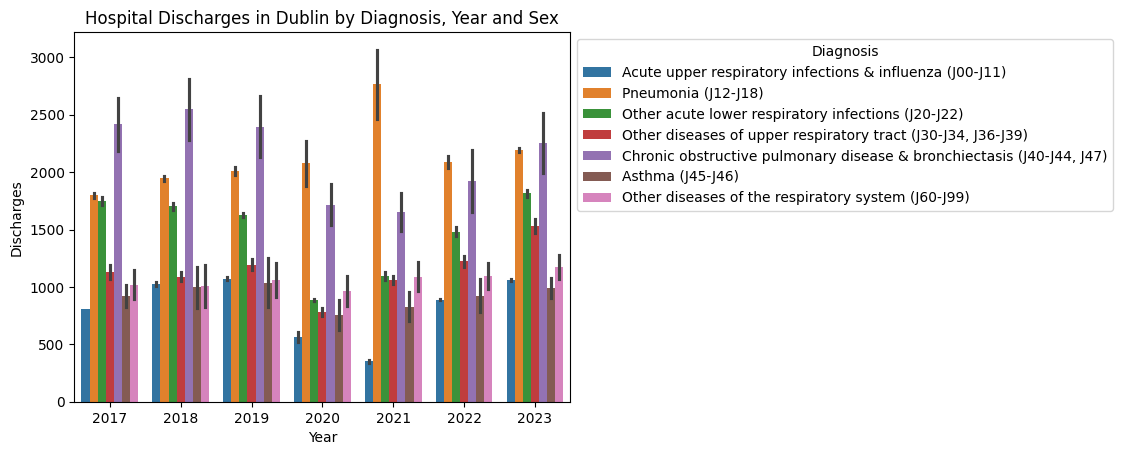

In [154]:
#look at dublin initially
hosp_discharges_dub = hosp_discharges[hosp_discharges['Area']== 'Co. Dublin']
sns.barplot(data=hosp_discharges_dub, x='Year', y='VALUE', hue='ISHMT')
plt.title('Hospital Discharges in Dublin by Diagnosis, Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')

plt.legend(title='Diagnosis', bbox_to_anchor=(1, 1), loc='upper left')
#plt.tight_layout()
plt.savefig('dublin_hospital_discharges_diagnosis_year.png', format='png', bbox_inches='tight')
plt.show()

In [24]:
#read in the air quality data
my_air_data1 = pd.read_csv('air_quality_data_Jul_Dec_2023.csv')
my_air_data2 = pd.read_csv('air_quality_data_Jan_Jun_2023.csv')
my_air_data3 = pd.read_csv('air_quality_data_Jan_Dec_2022.csv')
my_air_data4 = pd.read_csv('air_quality_data_Jan_Dec_2021.csv')

In [25]:
#look at a few lines
my_air_data1.head()

,Timestamp,Value,PM,Location
0,2023-07-01 01:00:00,5.89,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2023-07-01 02:00:00,3.15,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2023-07-01 03:00:00,3.31,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2023-07-01 04:00:00,3.86,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2023-07-01 05:00:00,11.29,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [26]:
#look at a few lines
my_air_data2.head()

,Timestamp,Value,PM,Location
0,2023-01-01 01:00:00,15.06,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2023-01-01 02:00:00,18.95,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2023-01-01 03:00:00,18.98,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2023-01-01 04:00:00,16.64,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2023-01-01 05:00:00,17.66,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [27]:
#look at a few lines
my_air_data3.head()

,Timestamp,Value,PM,Location
0,2022-12-22 12:00:00,7.48,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2022-12-22 13:00:00,12.42,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2022-12-22 14:00:00,10.33,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2022-12-22 15:00:00,11.30,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2022-12-22 16:00:00,19.97,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [28]:
#look at a few lines
my_air_data4.head()

,Timestamp,Value,PM,Location
0,2021-02-19 00:00:00,3.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
1,2021-10-19 00:00:00,3.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
2,2021-11-09 00:00:00,1.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
3,2021-11-16 00:00:00,3.5,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
4,2021-11-17 00:00:00,4.2,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"


In [29]:
#merge all 4 datasets together
my_air_data = pd.concat([my_air_data1,my_air_data2,my_air_data3,my_air_data4])
my_air_data

,Timestamp,Value,PM,Location
0,2023-07-01 01:00:00,5.89,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2023-07-01 02:00:00,3.15,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2023-07-01 03:00:00,3.31,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2023-07-01 04:00:00,3.86,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2023-07-01 05:00:00,11.29,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
...,...,...,...,...
1082134,2021-12-31 19:00:00,25.34,10.0,"Air Quality Levels at Heatherton Park, Cork'"
1082135,2021-12-31 20:00:00,8.24,10.0,"Air Quality Levels at Heatherton Park, Cork'"
1082136,2021-12-31 21:00:00,15.66,10.0,"Air Quality Levels at Heatherton Park, Cork'"
1082137,2021-12-31 22:00:00,30.06,10.0,"Air Quality Levels at Heatherton Park, Cork'"


In [112]:
#look at the data
my_air_data.describe()


,Timestamp,Value,PM,Year
count,3624965,3.624965e+06,3.624965e+06,3.624965e+06
mean,2022-07-30 15:55:00.955789568,1.046090e+01,6.360518e+00,2.022058e+03
min,2021-01-01 01:00:00,0.000000e+00,2.500000e+00,2.021000e+03
25%,2021-11-12 14:00:00,4.380000e+00,2.500000e+00,2.021000e+03
50%,2022-08-04 14:00:00,7.550000e+00,1.000000e+01,2.022000e+03
75%,2023-04-27 19:00:00,1.276000e+01,1.000000e+01,2.023000e+03
max,2023-12-31 23:00:00,2.010800e+03,1.000000e+01,2.023000e+03
std,NaN,1.245202e+01,3.748372e+00,8.070214e-01


In [113]:
#look at min
my_air_data['Value'].min()

0.0

In [114]:
#look at max
my_air_data['Value'].max()

2010.8

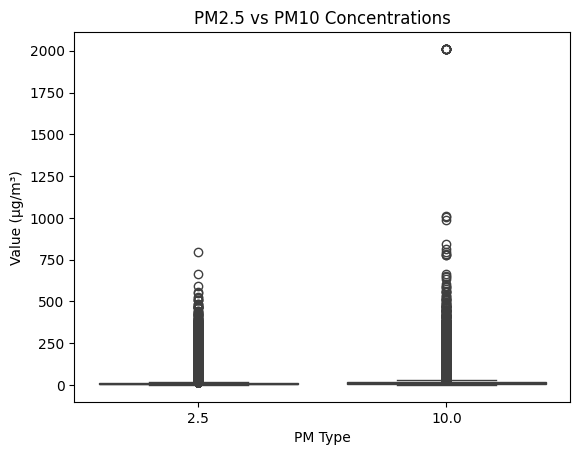

In [136]:
#look at value and see if there are many outliers
sns.boxplot(x='PM', y='Value',data=my_air_data)
plt.title('PM2.5 vs PM10 Concentrations')
plt.xlabel('PM Type')
plt.ylabel('PM Value (µg/m³)')
plt.show()

C:\Users\lsmyth\AppData\Local\Temp\ipykernel_37020\3116027635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_air_data['Value'])


<Axes: xlabel='Value', ylabel='Density'>

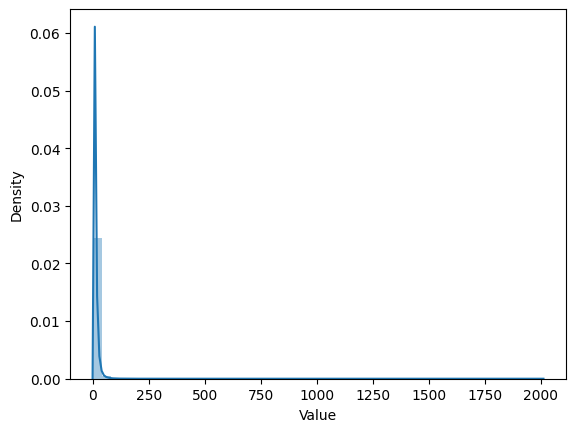

In [122]:
#look at distribution
sns.distplot(my_air_data['Value'])

In [60]:
#Look at the data types
my_air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3624965 entries, 0 to 1082138
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Value      float64       
 2   PM         float64       
 3   Location   object        
 4   Year       int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 152.1+ MB


In [61]:
#start cleaning and prepping the data

#convert timestamp to datetime
my_air_data['Timestamp'] =  pd.to_datetime(my_air_data['Timestamp'] )

In [62]:
#check that it worked
my_air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3624965 entries, 0 to 1082138
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Value      float64       
 2   PM         float64       
 3   Location   object        
 4   Year       int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 152.1+ MB


In [63]:
#make a year field
my_air_data['Year'] =  my_air_data['Timestamp'].dt.year 

In [64]:
my_air_data

,Timestamp,Value,PM,Location,Year
0,2023-07-01 01:00:00,5.89,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023
1,2023-07-01 02:00:00,3.15,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023
2,2023-07-01 03:00:00,3.31,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023
3,2023-07-01 04:00:00,3.86,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023
4,2023-07-01 05:00:00,11.29,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023
...,...,...,...,...,...
1082134,2021-12-31 19:00:00,25.34,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021
1082135,2021-12-31 20:00:00,8.24,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021
1082136,2021-12-31 21:00:00,15.66,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021
1082137,2021-12-31 22:00:00,30.06,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021


In [72]:
#check all years are in 
my_air_data['Year'].unique()

array([2023, 2022, 2021])

In [73]:
#look at unique locations
my_air_data['Location'].unique()

array(["Air Quality Levels at Briarhill, Co. Galway'",
       "Air Quality Levels at Lucan, Co. Dublin'",
       "Air Quality Levels at Killarney Anam Arts and Cultural Centre, Co. Kerry'",
       "Air Quality Levels at Leixlip Library, Co. Kildare'",
       "Air Quality Levels at Eyre Square, Galway'",
       "Air Quality Levels at Cork Lower Glanmire Road'",
       "Air Quality Levels at Claremorris, Co. Mayo'",
       "Air Quality Levels at Edenderry Library, Co. Offaly'",
       "Air Quality Levels at Greystones Fire Station'",
       "Air Quality Levels at Ballinasloe, Co. Galway'",
       "Air Quality Levels at Amiens Street, Dublin 1'",
       "Air Quality Levels at Cork Airport'",
       "Air Quality Levels at Clonakilty, Co. Cork'",
       "Air Quality Levels at Carrigaline, Co. Cork'",
       "Air Quality Levels at Merchants Quay, Waterford City'",
       "Air Quality Levels at Henry Street, Limerick'",
       "Air Quality Levels at Drogheda, Co. Louth'",
       "Air Quality 

In [74]:
#clean the locations, extract the counties
my_air_data['County'] = my_air_data['Location'].str.rsplit(',').str[-1] 
my_air_data

,Timestamp,Value,PM,Location,Year,County
0,2023-07-01 01:00:00,5.89,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023,Co. Galway'
1,2023-07-01 02:00:00,3.15,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023,Co. Galway'
2,2023-07-01 03:00:00,3.31,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023,Co. Galway'
3,2023-07-01 04:00:00,3.86,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023,Co. Galway'
4,2023-07-01 05:00:00,11.29,2.5,"Air Quality Levels at Briarhill, Co. Galway'",2023,Co. Galway'
...,...,...,...,...,...,...
1082134,2021-12-31 19:00:00,25.34,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021,Cork'
1082135,2021-12-31 20:00:00,8.24,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021,Cork'
1082136,2021-12-31 21:00:00,15.66,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021,Cork'
1082137,2021-12-31 22:00:00,30.06,10.0,"Air Quality Levels at Heatherton Park, Cork'",2021,Cork'


In [75]:
#look at unique counties
my_air_data['County'].unique()

array([" Co. Galway'", " Co. Dublin'", " Co. Kerry'", " Co. Kildare'",
       " Galway'", "Air Quality Levels at Cork Lower Glanmire Road'",
       " Co. Mayo'", " Co. Offaly'",
       "Air Quality Levels at Greystones Fire Station'", " Dublin 1'",
       "Air Quality Levels at Cork Airport'", " Co. Cork'",
       " Waterford City'", " Limerick'", " Co. Louth'", " Co. Leitrim'",
       "Air Quality Levels at Cavan Town'", " Co. Tipperary'",
       " Co. Limerick'", " Co. Westmeath'", " Dublin 2'", " Co. Meath'",
       "Air Quality Levels at Tipperary Town'", " Co. Donegal'",
       "Air Quality Levels at Wexford Opera House'",
       "Air Quality Levels at Paddy Browne\\'", " Dublin 8'",
       "Air Quality Levels at Carlow Town'",
       "Air Quality Levels at Roscommon Town'",
       "Air Quality Levels at St. Anne\\'", " Dublin 10'", " Dublin 12'",
       " Dublin 3'", " Dublin 11'", " Dublin 24'",
       "Air Quality Levels at Longford Town'",
       "Air Quality Levels at People\

In [70]:
#check how many values for each county.. Dublin has a lot might be just worth pulling all dublin locations and averaging the values
my_air_data_mean['County'].value_counts()

County
 Limerick'                                         449684
 Dublin 15'                                        198544
 Dublin 4'                                         195936
 Co. Cork'                                         159873
 Co. Dublin'                                       139272
Air Quality Levels at People\'                     130288
 Dublin 8'                                         101336
 Co. Wicklow'                                      100092
 Co. Offaly'                                        90384
Air Quality Levels at Carlow Town'                  86820
 Co. Leitrim'                                       84634
 Dublin 1'                                          84296
 Co. Donegal'                                       80252
 Co. Kildare'                                       78304
 Co. Galway'                                        77928
 Co. Kerry'                                         77004
 Co. Louth'                                         75868
 Kilken

In [80]:
#pull the dublin 15 ones as that has the most datapoints and use it to represent Dublin.
#my_air_data_dub = my_air_data_mean[my_air_data_mean['Location'].str.contains('Dublin', case=False, na=False)]
my_air_data_dub = my_air_data[my_air_data['Location'].str.contains('Dublin 15', case=False, na=False)]

my_air_data_dub

,Timestamp,Value,PM,Location,Year,County
524553,2023-07-01 01:00:00,2.09,2.5,"Air Quality Levels at Blanchardstown, Dublin 15'",2023,Dublin 15'
524554,2023-07-01 02:00:00,2.76,2.5,"Air Quality Levels at Blanchardstown, Dublin 15'",2023,Dublin 15'
524555,2023-07-01 03:00:00,1.91,2.5,"Air Quality Levels at Blanchardstown, Dublin 15'",2023,Dublin 15'
524556,2023-07-01 04:00:00,1.44,2.5,"Air Quality Levels at Blanchardstown, Dublin 15'",2023,Dublin 15'
524557,2023-07-01 05:00:00,1.56,2.5,"Air Quality Levels at Blanchardstown, Dublin 15'",2023,Dublin 15'
...,...,...,...,...,...,...
889812,2021-12-31 19:00:00,14.25,10.0,"Air Quality Levels at Blanchardstown, Dublin 15'",2021,Dublin 15'
889813,2021-12-31 20:00:00,15.20,10.0,"Air Quality Levels at Blanchardstown, Dublin 15'",2021,Dublin 15'
889814,2021-12-31 21:00:00,12.03,10.0,"Air Quality Levels at Blanchardstown, Dublin 15'",2021,Dublin 15'
889815,2021-12-31 22:00:00,7.65,10.0,"Air Quality Levels at Blanchardstown, Dublin 15'",2021,Dublin 15'


In [139]:
#look at all the unique locations of the Dublin 15 location
my_air_data_dub['Location'].unique()

array(["Air Quality Levels at Blanchardstown, Dublin 15'"], dtype=object)

In [81]:
#drop timestamp,Location and County to group by year, health outcomes data is at year and county level so need to roll up.
my_air_data_mean = my_air_data_dub.drop('Timestamp', axis=1)
my_air_data_mean = my_air_data_mean.drop('Location', axis=1)
my_air_data_mean = my_air_data_mean.drop('County', axis=1)
my_air_data_mean

,Value,PM,Year
524553,2.09,2.5,2023
524554,2.76,2.5,2023
524555,1.91,2.5,2023
524556,1.44,2.5,2023
524557,1.56,2.5,2023
...,...,...,...
889812,14.25,10.0,2021
889813,15.20,10.0,2021
889814,12.03,10.0,2021
889815,7.65,10.0,2021


In [85]:
#group by year and PM to get one mean value for each, reset index to leave it like a flat datafrome
my_air_data_mean = my_air_data_mean.groupby(['Year','PM']).mean().reset_index()
my_air_data_mean

,Year,PM,Value
0,2021,2.5,7.564419
1,2021,10.0,13.989827
2,2022,2.5,7.845299
3,2022,10.0,15.129531
4,2023,2.5,7.162341
5,2023,10.0,13.393575


In [86]:
#look at datatypes - Year and PM should be categories
my_air_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      int32  
 1   PM      6 non-null      float64
 2   Value   6 non-null      float64
dtypes: float64(2), int32(1)
memory usage: 252.0 bytes


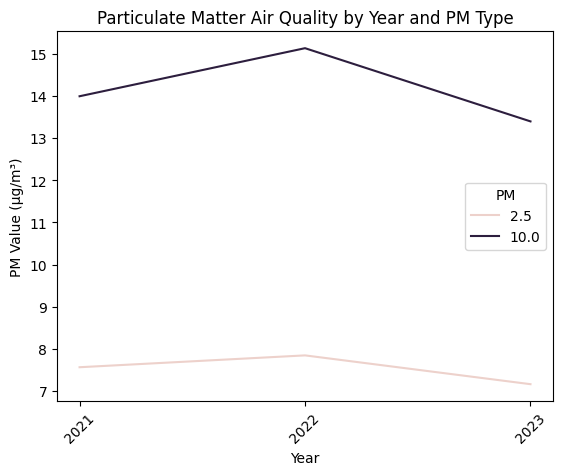

In [148]:
#look at mean PMs over the 3 years
sns.lineplot(data=my_air_data_mean, x='Year', y='Value', hue='PM')
plt.title('Particulate Matter Air Quality by Year and PM Type')
plt.xlabel('Year')
plt.ylabel('PM Value (µg/m³)')
plt.xticks(rotation=45)
plt.xticks([2021, 2022, 2023])

plt.savefig('dublin_pm_values_plot.png', format='png', bbox_inches='tight')
plt.show()

In [88]:
#bring Dublin Air Quality and Health Outcomes data together for 2021-2023
#limit the health data to 2021-2023
hosp_discharges_dub = hosp_discharges_dub[hosp_discharges_dub['Year']>2020]
hosp_discharges_dub

,Statistic Label,Year,Sex,ISHMT,Area,UNIT,VALUE
3050,All Hospital Discharges,2021,Male,Acute upper respiratory infections & influenza...,Co. Dublin,Number,367.0
3079,All Hospital Discharges,2021,Male,Pneumonia (J12-J18),Co. Dublin,Number,3066.0
3108,All Hospital Discharges,2021,Male,Other acute lower respiratory infections (J20-...,Co. Dublin,Number,1126.0
3137,All Hospital Discharges,2021,Male,Other diseases of upper respiratory tract (J30...,Co. Dublin,Number,1095.0
3166,All Hospital Discharges,2021,Male,Chronic obstructive pulmonary disease & bronch...,Co. Dublin,Number,1487.0
3195,All Hospital Discharges,2021,Male,Asthma (J45-J46),Co. Dublin,Number,699.0
3224,All Hospital Discharges,2021,Male,Other diseases of the respiratory system (J60-...,Co. Dublin,Number,1216.0
3282,All Hospital Discharges,2021,Female,Acute upper respiratory infections & influenza...,Co. Dublin,Number,341.0
3311,All Hospital Discharges,2021,Female,Pneumonia (J12-J18),Co. Dublin,Number,2466.0
3340,All Hospital Discharges,2021,Female,Other acute lower respiratory infections (J20-...,Co. Dublin,Number,1057.0


In [89]:
#change how my_air_data_dub is structured to make the PMs have their own column for merging
my_air_data_dub_pivot = my_air_data_mean.pivot(index='Year', columns='PM', values='Value').reset_index()

#change the names of the new columns.
my_air_data_dub_pivot.columns = ['Year', 'PM2.5', 'PM10']
my_air_data_dub_pivot


,Year,PM2.5,PM10
0,2021,7.564419,13.989827
1,2022,7.845299,15.129531
2,2023,7.162341,13.393575


In [90]:
#merge the datasets on year adding the new pm2.5 and pm10 columns to the health outcomes data
merged_data = pd.merge(hosp_discharges_dub, my_air_data_dub_pivot, on='Year', how='left')

print(merged_data)

            Statistic Label  Year     Sex  \
0   All Hospital Discharges  2021    Male   
1   All Hospital Discharges  2021    Male   
2   All Hospital Discharges  2021    Male   
3   All Hospital Discharges  2021    Male   
4   All Hospital Discharges  2021    Male   
5   All Hospital Discharges  2021    Male   
6   All Hospital Discharges  2021    Male   
7   All Hospital Discharges  2021  Female   
8   All Hospital Discharges  2021  Female   
9   All Hospital Discharges  2021  Female   
10  All Hospital Discharges  2021  Female   
11  All Hospital Discharges  2021  Female   
12  All Hospital Discharges  2021  Female   
13  All Hospital Discharges  2021  Female   
14  All Hospital Discharges  2022    Male   
15  All Hospital Discharges  2022    Male   
16  All Hospital Discharges  2022    Male   
17  All Hospital Discharges  2022    Male   
18  All Hospital Discharges  2022    Male   
19  All Hospital Discharges  2022    Male   
20  All Hospital Discharges  2022    Male   
21  All Ho

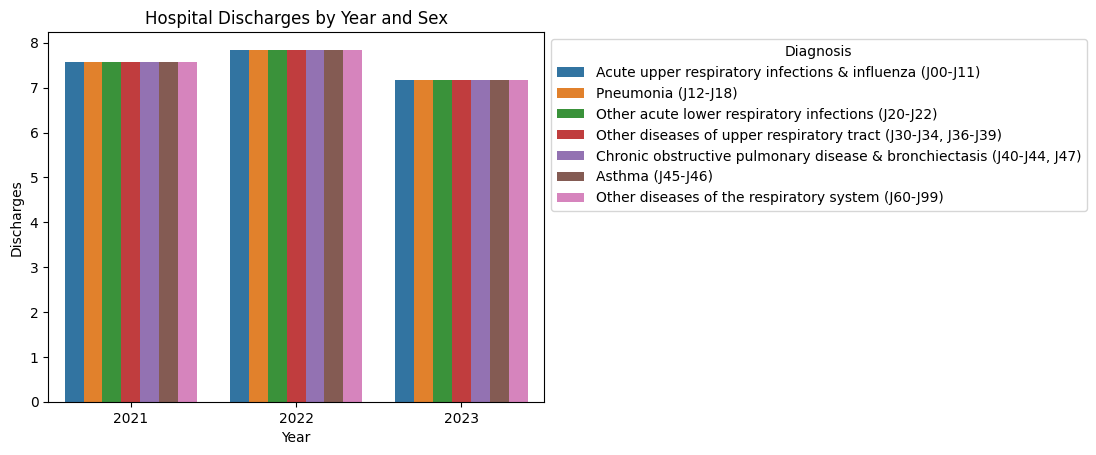

In [91]:
#start to visualise what that looks like
sns.barplot(data=merged_data, x='Year', y='PM2.5', hue='ISHMT')
plt.title('Hospital Discharges by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')

plt.legend(title='Diagnosis', bbox_to_anchor=(1, 1), loc='upper left')
#plt.tight_layout()
plt.show()

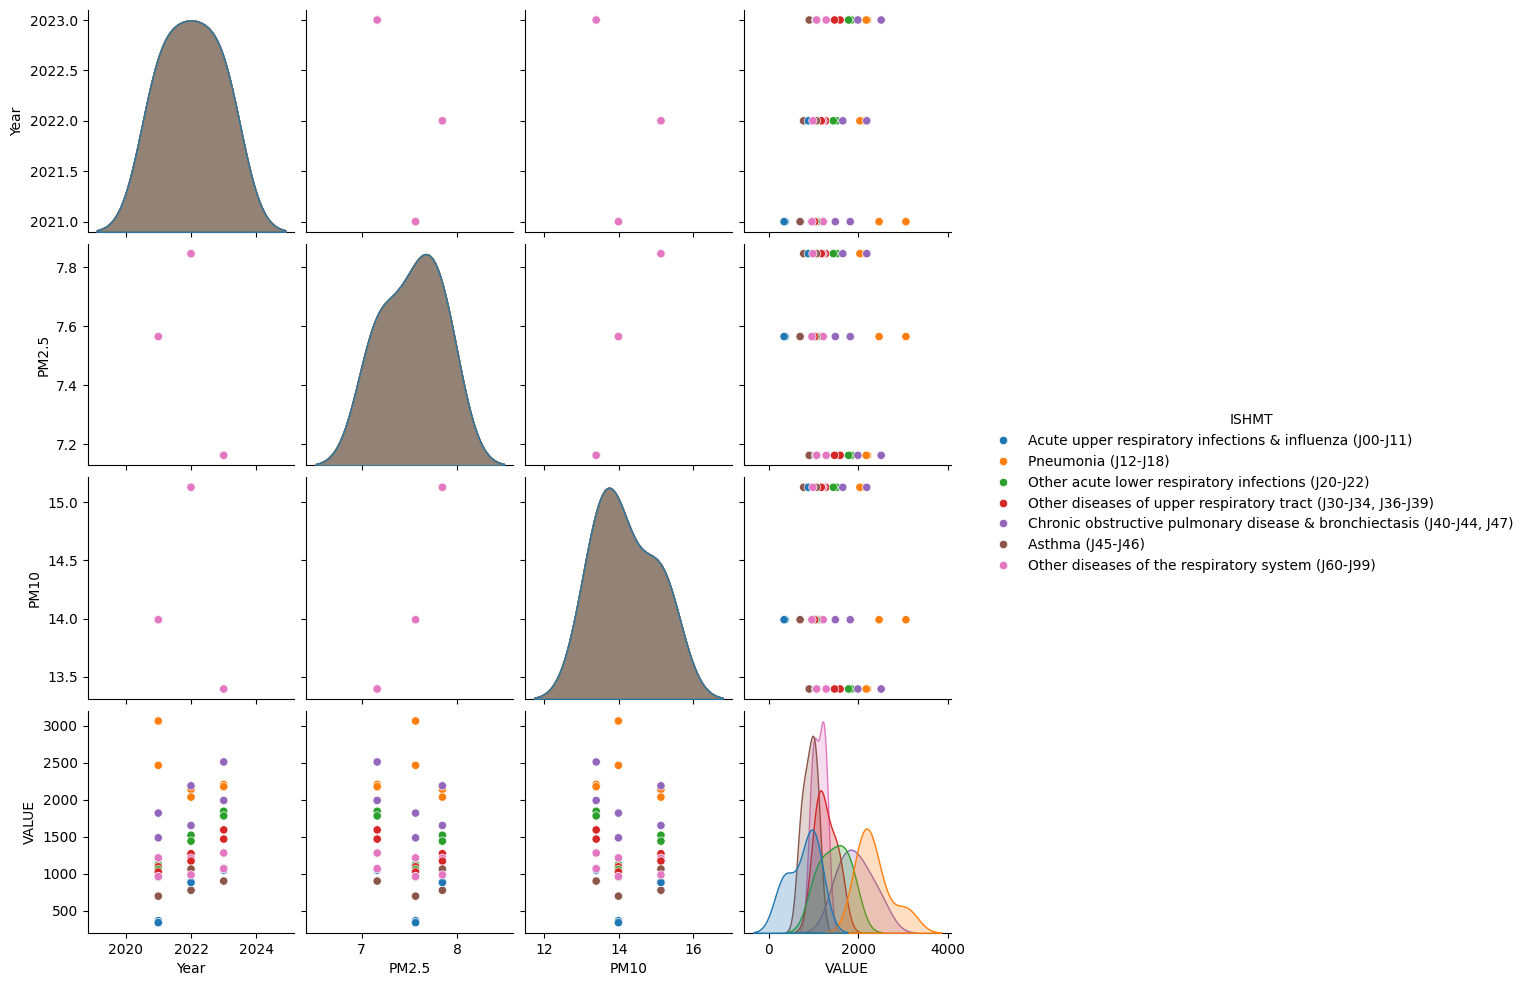

In [92]:
# Select relevant columns for pairplot
pais_data = merged_data[['Year', 'PM2.5', 'PM10','VALUE','ISHMT']]

# Pair plot
sns.pairplot(pais_data, hue='ISHMT')
plt.show()

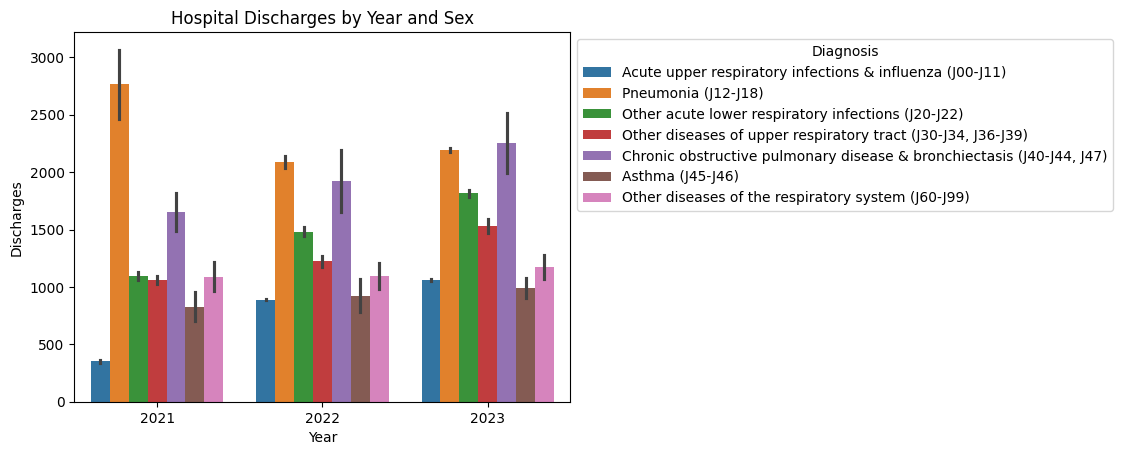

In [95]:
#look at dublin initially
sns.barplot(data=merged_data, x='Year', y='VALUE', hue='ISHMT')
plt.title('Hospital Discharges by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Discharges')

plt.legend(title='Diagnosis', bbox_to_anchor=(1, 1), loc='upper left')
#plt.tight_layout()
plt.show()

In [96]:
#sum the values up for the Diagnosis just to look at one value per year the same as the PM's
merged_data_agg = merged_data.groupby('Year').agg(
    VALUE=('VALUE', 'sum'),  #sum of VALUE per year
    PM2_5=('PM2.5', 'mean'),  #mean of PM2.5 per year (as already duplicated)
    PM10=('PM10', 'mean')  # Mean of PM10 per year (as already duplicated)
).reset_index()
merged_data_agg

,Year,VALUE,PM2_5,PM10
0,2021,17688.0,7.564419,13.989827
1,2022,19248.0,7.845299,15.129531
2,2023,22029.0,7.162341,13.393575


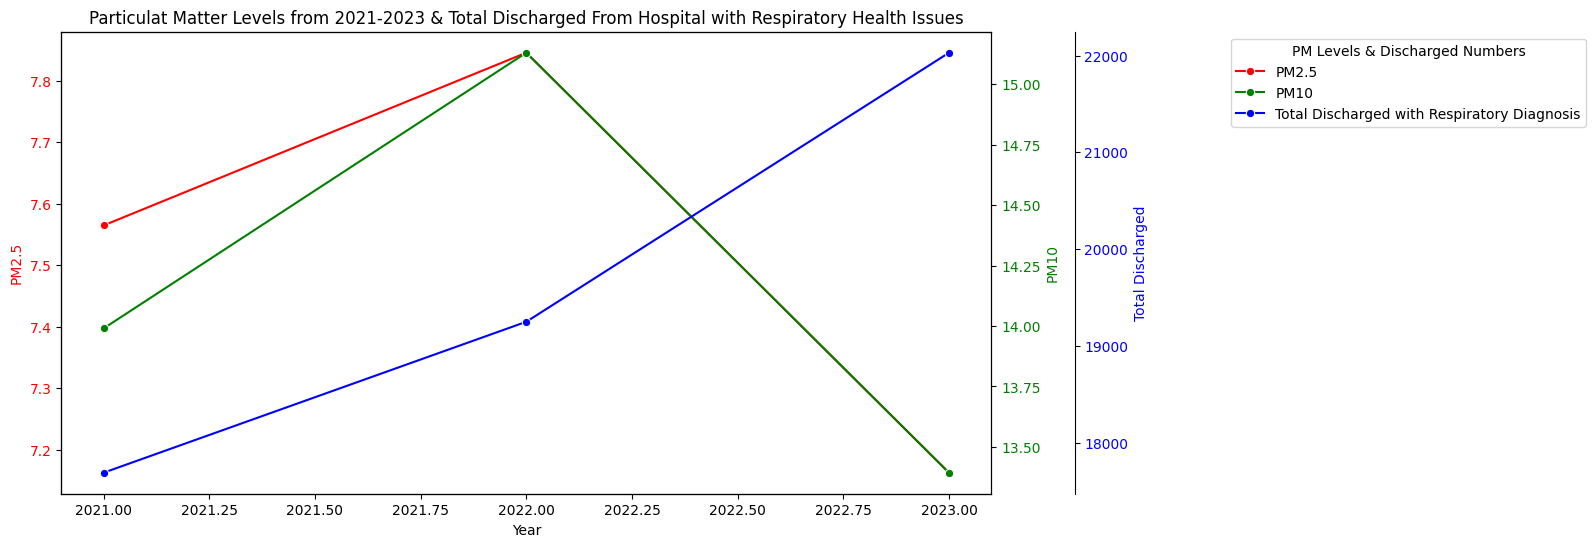

In [147]:
#create a chart with 3 lines and 3 axis to show the 2 PM values with the diagnosis value
fig, ax1 = plt.subplots(figsize=(12, 6))

#set the first axis up for PM2.5
sns.lineplot(x='Year', y='PM2_5', data=merged_data_agg, ax=ax1, color='r', marker='o', label='PM2.5')
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5', color='r')
ax1.tick_params(axis='y', labelcolor='r')

#set the second axis up for PM10
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='PM10', data=merged_data_agg, ax=ax2, color='g', marker='o', label='PM10')
ax2.set_ylabel('PM10', color='g')
ax2.tick_params(axis='y', labelcolor='g')

#set the third axis up for Diagnosis numbers
ax3 = ax1.twinx()
#offset the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='Year', y='VALUE', data=merged_data_agg, ax=ax3, color='b', marker='o', label='Total Discharged with Respiratory Diagnosis')
ax3.set_ylabel('Total Discharged', color='b')
ax3.tick_params(axis='y', labelcolor='b')

#make a legend for all
handles, labels = ax1.get_legend_handles_labels() 
handles2, labels2 = ax2.get_legend_handles_labels() 
handles3, labels3 = ax3.get_legend_handles_labels() 
ax1.legend(handles + handles2 + handles3, labels + labels2 + labels3, title='PM Levels & Discharged Numbers', bbox_to_anchor=(1.25, 1), loc='upper left')

#hide legends for ax2 and ax3
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)

#save the plot
plt.title('Particulat Matter Levels from 2021-2023 & Total Discharged From Hospital with Respiratory Health Issues')
plt.savefig('dublin_pm_values_health_outcomes_plot.png', format='png', bbox_inches='tight')
plt.show()